In [ ]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs

import os
import zipfile
import random

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from shutil import copyfile

In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

"""!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()"""


'!wget --no-check-certificate     "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"     -O "/tmp/cats-and-dogs.zip"\n\nlocal_zip = \'/tmp/cats-and-dogs.zip\'\nzip_ref = zipfile.ZipFile(local_zip, \'r\')\nzip_ref.extractall(\'/tmp\')\nzip_ref.close()'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
local_zip = '/content/gdrive/My Drive/cats_and_dogs_no_exif.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
print(len(os.listdir('/content/cats_and_dogs/kagglecatsanddogs_3367a/PetImages/Dog/')))
print(len(os.listdir('/content/cats_and_dogs/kagglecatsanddogs_3367a/PetImages/Cat/')))

12501
12501


In [ ]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'

try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = '/content/cats_and_dogs/kagglecatsanddogs_3367a/PetImages/Cat/'
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = '/content/cats_and_dogs/kagglecatsanddogs_3367a/PetImages/Dog/'
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)


# YOUR CODE ENDS HERE


# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
10125.jpg is zero length, so ignoring.
10501.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11248
11250
1250
1250


To remove the metadata(exif information) from images we need to create directories again and save images there.

In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1./255) #, rotation_range=45, zoom_range=0.3, 
                                   #horizontal_flip=True, width_shift_range=0.2, height_shift_range=0.2)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=32, 
                                                    target_size=(150,150), class_mode="binary")


VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=32,
                                                         target_size=(150,150), class_mode="binary")




# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22496 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS

model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="valid", input_shape=(150, 150, 3)),
        tf.keras.layers.AveragePooling2D((2,2)),

        tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="valid"),
        tf.keras.layers.AveragePooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="valid"),
        tf.keras.layers.AveragePooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="valid"),
        tf.keras.layers.AveragePooling2D((2,2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1024, activation="relu"), 
        tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
average_pooling2d_20 (Averag (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
average_pooling2d_21 (Averag (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
history = model.fit(train_generator,
                              epochs=15,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/15
703/703 [==============================] - 85s 122ms/step - loss: 0.6644 - acc: 0.6141 - val_loss: 0.5363 - val_acc: 0.7292
Epoch 2/15
703/703 [==============================] - 86s 123ms/step - loss: 0.5432 - acc: 0.7276 - val_loss: 0.4756 - val_acc: 0.7680
Epoch 3/15
703/703 [==============================] - 86s 123ms/step - loss: 0.4828 - acc: 0.7688 - val_loss: 0.5133 - val_acc: 0.7556
Epoch 4/15
703/703 [==============================] - 86s 122ms/step - loss: 0.4317 - acc: 0.7996 - val_loss: 0.5033 - val_acc: 0.7564
Epoch 5/15
703/703 [==============================] - 85s 121ms/step - loss: 0.3944 - acc: 0.8251 - val_loss: 0.3713 - val_acc: 0.8292
Epoch 6/15
703/703 [==============================] - 86s 122ms/step - loss: 0.3625 - acc: 0.8436 - val_loss: 0.3629 - val_acc: 0.8456
Epoch 7/15
703/703 [==============================] - 85s 121ms/step - loss: 0.3456 - acc: 0.8554 - val_loss: 0.3133 - val_acc: 0.8664
Epoch 8/15
703/703 [==============================] - 8

Text(0.5, 1.0, 'Training and validation loss')

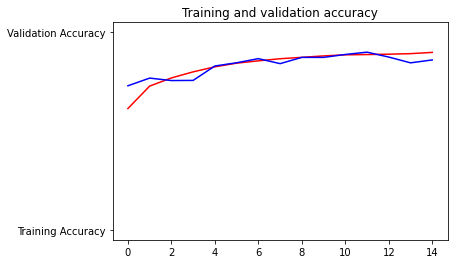

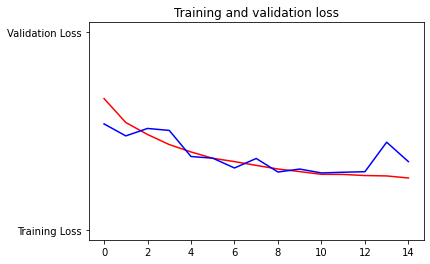

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving download (1).jpeg to download (1).jpeg
[[0.]]
download (1).jpeg is a cat


In [ ]:
import time

t = time.time()

export_path_keras = "./cats_vs_dogs_{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./cats_vs_dogs_1592820153.h5
